In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")
from global_utilities import LoT_indices_to_operators
from functions import *
from importlib import reload
import pandas as pd

In [6]:
from glob import glob
from os.path import splitext, basename

# Setup

In [2]:
sns.set_style("dark")

In [3]:
figwidth = 8.27

In [4]:
# get minimal formulas length
with open('/mnt/c/Users/faust/Documents/LoTNeuralNets/ANN_complexity/data/complete_lengths.npy', 'rb') as openfile:
    lengths = np.load(openfile)

In [5]:
NUM_PROPERTIES = 4
LoTs = LoT_indices_to_operators()

categories = np.array([
    [int(a) for a in f'{n:0{2**NUM_PROPERTIES}b}']
    for n in range(0, 2**(2**NUM_PROPERTIES))
])

In [21]:
def parse_path(pathn):
    
    def evaluate(x):
        try:
            return eval(x)
        except NameError:
            return x
    
    p_basename = splitext(basename(pathn))[0]
    return {
        x.split('-')[0]: evaluate(x.split('-')[1])
        for x 
        in p_basename.split('_')
    }

## Figure - Distribution of lengths of minimal formulas

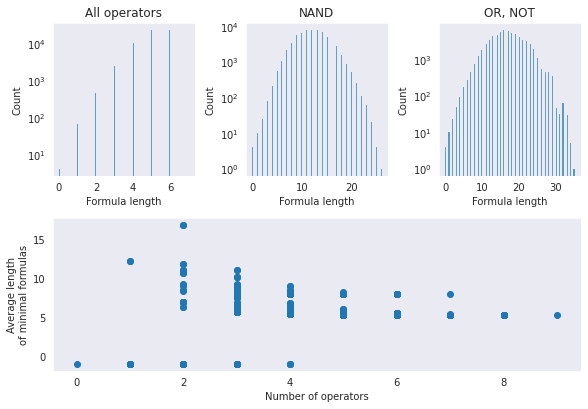

In [13]:
fig, axes = plt.subplot_mosaic(
    """
    BCD
    AAA
    """
) 

fig.set_size_inches(figwidth, figwidth*0.5)

axes_all_langs = axes['A']
axes_all_langs.scatter(
    LoTs.values.sum(axis=1),
    lengths.mean(axis=1)
)

axes_all_langs.set_xlabel('Number of operators')
axes_all_langs.set_ylabel('Average length\nof minimal formulas')
# axes_all_langs.set_ylim(0, 20)

sns.histplot(
    lengths[-1],
    ax=axes['B'],
    log_scale=(False,True)
)
axes['B'].set_xlabel('Formula length')
axes['B'].set_title('All operators')

sns.histplot(
    lengths[4],
    ax=axes['C'],
    log_scale=(False,True)
)
axes['C'].set_xlabel('Formula length')
axes['C'].set_title('NAND')

sns.histplot(
    lengths[320],
    ax=axes['D'],
    log_scale=(False,True)
)
axes['D'].set_xlabel('Formula length')
axes['D'].set_title(r'OR, NOT')

fig.set_size_inches(figwidth, figwidth*0.7)
fig.tight_layout()
fig.savefig(
    './plots/minimal_formulas.jpg',
    dpi=300
)

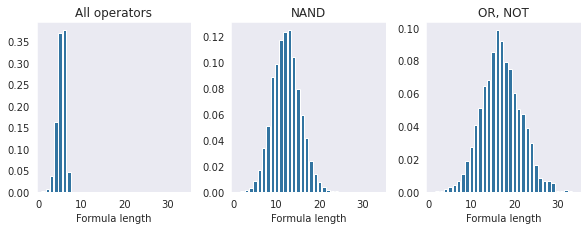

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1,
    3, 
    sharex=True
)

xs, ys = np.unique(
    lengths[-1], 
    return_counts=True
)
sns.barplot(
    x=xs,
    y=ys/ys.sum(),
    ax=ax1,
    # log_scale=(False,True)
    color='C0'
)
ax1.set_xlabel('Formula length')
ax1.set_title('All operators')

xs, ys = np.unique(
    lengths[4], 
    return_counts=True
)
sns.barplot(
    x=xs,
    y=ys/ys.sum(),
    ax=ax2,
    # log_scale=(False,True)
    color='C0'
)
ax2.set_xlabel('Formula length')
ax2.set_title('NAND')

xs, ys = np.unique(
    lengths[320], 
    return_counts=True
)
sns.barplot(
    x=xs,
    y=ys/ys.sum(),
    ax=ax3,
    # log_scale=(False,True)
    color='C0'
)
ax3.set_xlabel('Formula length')
ax3.set_title(r'OR, NOT')

ax3.set_xticks(np.arange(0, 40, 10))

fig.set_size_inches(figwidth, figwidth*0.4)
fig.tight_layout()
fig.savefig(
    './plots/minimal_formulas_topplot.jpg',
    dpi=300
)

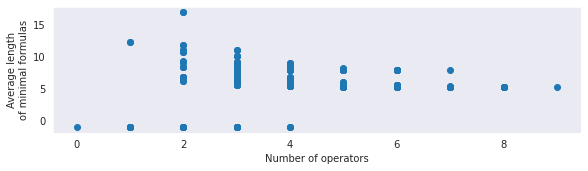

In [45]:
fig, ax = plt.subplots()
ax.scatter(
    LoTs.values.sum(axis=1),
    lengths.mean(axis=1),
    color='C0'
)
ax.set_xlabel('Number of operators')
ax.set_ylabel('Average length\nof minimal formulas')
fig.set_size_inches(figwidth, figwidth*0.3)
fig.tight_layout()
fig.savefig(
    './plots/minimal_formulas_bottomplot.jpg',
    dpi=300
)

Std of average minimal formulas among the 9 LoTs with 8 operators

In [100]:
indices_8 = LoTs.sum(axis=1)==8
lengths[indices_8].mean(axis=1).std()

0.00038044733628422845

## Figure - Average complexity of each category across all LoTs

In [6]:
categories = np.array(list(map(number_to_category, np.arange(0, 65536))))
number_properties_objects = categories[[43690, 52428, 61680, 65280]].sum(0)
average_complexity = lengths[lengths[:,0]!=-1].mean(0)

# a encodes how many properties each object has
# 0 and 4 are excluded because they only have one object each
a = np.row_stack((
    number_properties_objects==1,
    number_properties_objects==2,
    number_properties_objects==3
))

category_quantitative = np.all((# If a, then the category is always true
        np.all(1-a[:,None] |  categories[None], axis=2)
        | # OR
        # If a, then the category is always false
        np.all((1-a[:,None]) | 1-categories[None], axis=2)),
    axis=0
)

argsort_number_properties = np.argsort(number_properties_objects)

# find increasing mons and decreasing mons and non-mons
ordered_diff = np.diff(categories[category_quantitative][:,argsort_number_properties], axis=1)

ones = ordered_diff == 1
minus_ones = ordered_diff == -1

monotonic_increasing = (ones.sum(1)<=1)&(minus_ones.sum(1)==0)
monotonic_decreasing = (ones.sum(1)==0)&(minus_ones.sum(1)<=1)
non_monotonic = np.logical_not(monotonic_increasing)&np.logical_not(monotonic_decreasing)

quantitative_average_complexity = average_complexity[np.argwhere(category_quantitative).flatten()]

In [7]:
# find categories that are true when objects have any number of properties
np.argwhere(np.all(1-(
    categories ^ 
    (number_properties_objects==2)  # specify number of properties here
), axis=1))

array([[5736]], dtype=int64)

In [13]:
print('Avg complexity for category with 0 properties: ', average_complexity[1])
print('Avg complexity for category with 1 properties: ', average_complexity[278])
print('Avg complexity for category with 2 properties: ', average_complexity[5736])
print('Avg complexity for category with 3 properties: ', average_complexity[26752])
print('Avg complexity for category with 4 properties: ', average_complexity[32768])

Avg complexity for category with 0 properties:  3.7983193277310923
Avg complexity for category with 1 properties:  8.264705882352942
Avg complexity for category with 2 properties:  9.275210084033613
Avg complexity for category with 3 properties:  8.277310924369749
Avg complexity for category with 4 properties:  3.668067226890756


In [16]:
# there is a total of 32 quantitative categories
category_quantitative.sum()

32

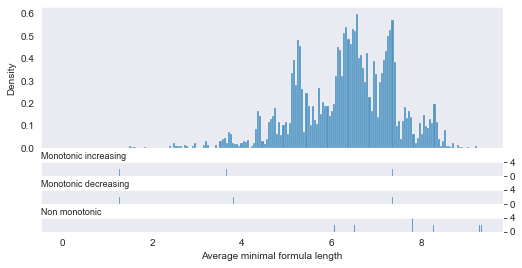

In [65]:
fig, axes = plt.subplots(
    4,1,
    sharex=True,
    gridspec_kw={'height_ratios':[10,1,1,1]},
    figsize=(figwidth, figwidth*0.5)
)

sns.histplot(
    average_complexity,
    ax=axes[0],
    stat='density',
    bins=200
)

sns.histplot(
    average_complexity[np.argwhere(category_quantitative).flatten()[monotonic_increasing]],
    ax=axes[1],
    bins=200,
#     color='blue'
)

sns.histplot(
    average_complexity[np.argwhere(category_quantitative).flatten()[monotonic_decreasing]],
    ax=axes[2],
    bins=200,
#     color='red'
)

sns.histplot(
    average_complexity[np.argwhere(category_quantitative).flatten()[non_monotonic]],
    ax=axes[3],
    bins=200,
#     color='green'
)

for ax in axes[1:]:
    ax.set_ylim(0,4)
    ax.set_ylabel('')
    ax.set_yticks([0,4])
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()    

for ax, label in zip(axes[1:], ['Monotonic increasing', 'Monotonic decreasing', 'Non monotonic']):
    ax.set_title(
        label,
        fontsize=9,
        loc='left',
        pad=3
    )

axes[3].set_xlabel('Average minimal formula length')
fig.subplots_adjust(hspace=0.3)

fig.savefig('./plots/minimal_formulas_across_LoTs.jpg', dpi=300)

In [105]:
number_to_category(43690)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [109]:
list(map(number_to_category, np.argwhere(average_complexity==0).flatten()))

[[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [89]:
np.argmax(average_complexity)

26753

In [113]:
np.argwhere(average_complexity == average_complexity[26753])

array([[26753]], dtype=int64)

In [110]:
number_to_category(26753)

[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]

The most complex category (on average across LoTs) is the one that is true when the category has 0 or 3 of the properties!

# Plot across parameters

In [13]:
dfs = []
for path in glob('C:/Users/faust/Desktop/neuralNetsLoT/lot_recovery/*.npz'):
    with open(path, 'rb') as openf:
        npzfile = np.load(openf)
        LoTs_results = npzfile['LoTs']
        results = npzfile['results']

    results = results.squeeze()
    LoTs_results_df = pd.DataFrame(
        LoTs_results,
        columns=['O','A','N','C','B','X','NA','NOR','NC']
    )
    LoTs_names = (
        pd.DataFrame(np.where(LoTs_results_df, LoTs_results_df.columns, ''))
        .apply(lambda x: '_'.join([a for a in x if a!='']), axis=1)
    )
    
    df = pd.DataFrame(results, columns=LoTs_names, index=LoTs_names).unstack().reset_index()
    df = df.rename(
        {
            'level_0': 'inferred_LoT',
            'level_1': 'true_LoT',
            0: 'logp'
        }, 
        axis='columns'
    )
    
    df['p'] = np.exp(df['logp'])
    
    df['n_ops'] = df['true_LoT'].str.count('_')+1
    
    params = parse_path(path)
    df['datasize'] = params['datasize']
    df['nparticipants'] = params['nparticipants']
    df['temp'] = params['temp']
    
    dfs.append(df)

dfs = pd.concat(dfs)

dfs['surprisal'] = -dfs['logp']*dfs['p']

## Figure - Variation in the overall recoverability of data

In [28]:
mean_entropies_by_true_LoT = (
    entropy_by_params_combo[['true_LoT','surprisal']]
    .groupby('true_LoT')
    .agg([np.mean, np.std])
    ['surprisal']
    .sort_values('mean', ascending=False)
)

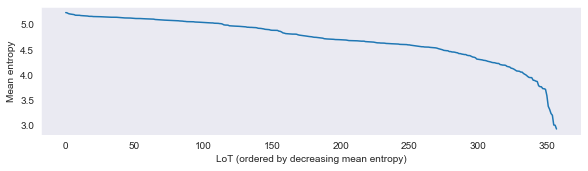

In [34]:
fig, ax = plt.subplots(1,1,figsize=(figwidth, figwidth*0.3))

sns.lineplot(
    x=np.arange(len(mean_entropies_by_true_LoT)),
    y=mean_entropies_by_true_LoT['mean'].values,
    ax=ax
)

ax.set_ylabel('Mean entropy')
ax.set_xlabel('LoT (ordered by decreasing mean entropy)')
plt.tight_layout()
fig.savefig('./plots/marginal_posterior_entropy_PNAS.jpg', dpi=300)

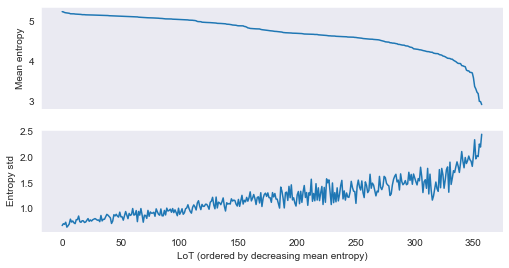

In [95]:
fig, (ax1,ax2) = plt.subplots(
    2,1, 
    sharex=True,
    figsize=(figwidth, figwidth*0.5)
)

sns.lineplot(
    x=np.arange(len(mean_entropies_by_true_LoT)),
    y=mean_entropies_by_true_LoT['mean'].values,
    ax=ax1
)
sns.lineplot(
    x=np.arange(len(mean_entropies_by_true_LoT)),
    y=mean_entropies_by_true_LoT['std'].values,
    ax=ax2
)

ax1.set_ylabel('Mean entropy')
ax2.set_ylabel('Entropy std')
ax2.set_xlabel('LoT (ordered by decreasing mean entropy)')

fig.savefig('./plots/marginal_posterior_entropy.jpg', dpi=300)

## Figure - Which LoTs can be recovered

In [14]:
dfs['accepted'] = dfs['p']>=0.95

In [15]:
df_groupby_params = dfs.groupby(['datasize', 'nparticipants', 'temp'])

In [16]:
df_groupby_params_sum = df_groupby_params.sum()

In [17]:
num_accepted_by_param = df_groupby_params_sum.loc[df_groupby_params_sum['accepted']>0,'accepted'].reset_index()

In [200]:
# find out how many total experiments there were for each value of each parameter
# (marginalized across all other params)
print(df_groupby_params_sum.sum(level=0)['p'])
print(df_groupby_params_sum.sum(level=1)['p'])
print(df_groupby_params_sum.sum(level=2)['p'])

datasize
1     6444.0
5     6444.0
10    6444.0
15    6444.0
Name: p, dtype: float64
nparticipants
1      4296.0
10     4296.0
30     4296.0
60     4296.0
120    4296.0
250    4296.0
Name: p, dtype: float64
temp
0.5    8592.0
1.0    8592.0
3.0    8592.0
Name: p, dtype: float64


In [118]:
# print number of recovered by parameter value
print(num_accepted_by_param.groupby('datasize').sum()['accepted'].to_latex())
print(num_accepted_by_param.groupby('nparticipants').sum()['accepted'].to_latex())
print(num_accepted_by_param.groupby('temp').sum()['accepted'].to_latex())

\begin{tabular}{lr}
\toprule
{} &  accepted \\
datasize &           \\
\midrule
1        &        35 \\
5        &       107 \\
10       &        51 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
{} &  accepted \\
nparticipants &           \\
\midrule
10            &         4 \\
30            &        10 \\
60            &        28 \\
120           &        55 \\
250           &        96 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
{} &  accepted \\
temp &           \\
\midrule
0.5  &        23 \\
1.0  &        87 \\
3.0  &        83 \\
\bottomrule
\end{tabular}



In [100]:
dfs_high_conf = dfs[dfs['p']>0.95]

Here find the two incorrectly identified LoTs

In [154]:
np.argwhere(np.logical_not((dfs_high_conf['inferred_LoT'] == dfs_high_conf['true_LoT']).values))

array([[35],
       [98]], dtype=int64)

In [156]:
dfs_high_conf.iloc[35]

inferred_LoT       X_NOR_NC
true_LoT         N_X_NOR_NC
logp              -0.010071
p                   0.98998
n_ops                     4
datasize                 10
nparticipants           250
temp                    3.0
surprisal           0.00997
Name: 28360, dtype: object

In [157]:
dfs_high_conf.iloc[98]

inferred_LoT         A_NA
true_LoT             N_NA
logp            -0.022618
p                0.977636
n_ops                   2
datasize                5
nparticipants         120
temp                  1.0
surprisal        0.022112
Name: 124581, dtype: object

Print the 30 LoTs that were recovered most often

In [161]:
df_mean_size = (
    dfs_high_conf
    .groupby('true_LoT')
    ['p']
    .agg(['mean', 'size'])
    .sort_values('size', ascending=False)
)

In [199]:
print(
    pd.concat(
        [df_mean_size[:15].reset_index(), df_mean_size[15:30].reset_index()],
        axis=1,
    )
    # exclude the mean
    .iloc[:,[0,2,3,5]]
    .to_latex(
        index=False,
#         columns=['mean', 'size']
    )
)

\begin{tabular}{lrlr}
\toprule
true\_LoT &  size &   true\_LoT &  size \\
\midrule
     A\_N &    19 &     A\_X\_NA &     3 \\
     O\_N &    14 &      B\_NOR &     3 \\
   A\_NOR &    14 &     O\_N\_NC &     3 \\
     NOR &    11 &        N\_C &     3 \\
A\_NOR\_NC &     8 &   O\_A\_N\_NC &     3 \\
   N\_NOR &     6 &      A\_N\_X &     3 \\
   A\_N\_B &     5 &    A\_N\_NOR &     3 \\
   O\_N\_B &     5 &      NA\_NC &     2 \\
   O\_NOR &     5 &    O\_A\_NOR &     2 \\
      NA &     4 & A\_B\_NOR\_NC &     2 \\
    B\_NC &     4 &     N\_X\_NC &     2 \\
    N\_NC &     4 &   X\_NA\_NOR &     2 \\
   O\_A\_N &     4 &    A\_B\_NOR &     2 \\
O\_NOR\_NC &     3 &      A\_N\_C &     2 \\
  NOR\_NC &     3 &      O\_N\_X &     2 \\
\bottomrule
\end{tabular}



## Figure - Posterior entropy as a function of number of operators

In [19]:
grouped_dfs = dfs.groupby(['datasize','nparticipants','temp','true_LoT'])
entropy_by_params_combo = grouped_dfs.sum('surprisal')
entropy_by_params_combo = entropy_by_params_combo.reset_index()
entropy_by_params_combo['n_ops'] = entropy_by_params_combo['true_LoT'].str.count('_')+1

In [20]:
number_LoTs_by_number_ops = (
    entropy_by_params_combo[['true_LoT', 'n_ops']]
    .drop_duplicates('true_LoT')
    ['n_ops']
    .value_counts()
    .sort_index()
)

In [21]:
figwidth = 8.27/4

In [22]:
def add_comment(ax, labels, col='black'):
    # starting y position, vertical y-shift, horizontal x-shift
    y, h, w = 4, -1, 0.4
    for i, label in enumerate(labels):
        x1, x2 = i-w, i+w
        ax.plot(
            [x1, x1, x2, x2], 
            [y,    y+h,  y+h,  y], 
            lw=0.5, 
            c=col,
        )
        ax.text(
            (x1+x2)*.5, 
            y+h-0.3, 
            label, 
            ha='center', 
            va='top', 
            color=col
        )

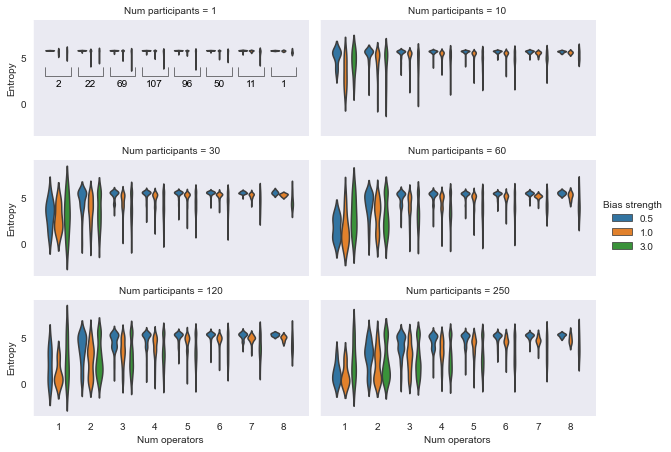

In [148]:
g = sns.catplot(
    x='Num operators', 
    y='Entropy',
    col='Num participants',
    hue='Bias strength',
    col_wrap=2,
    data=entropy_by_params_combo.rename(columns={
        'nparticipants': 'Num participants',
        'surprisal': 'Entropy',
        'n_ops': 'Num operators',
        'temp': 'Bias strength'
    }),
    kind='violin',
    inner=None,
    height=figwidth,
    aspect=figwidth/(figwidth*0.5)
)

add_comment(g.axes[0], number_LoTs_by_number_ops.values)

g.fig.savefig(
    './plots/entropy_by_params_combo.jpg', 
    dpi=300,
    bbox_inches="tight"
)

In [142]:
subdf = entropy_by_params_combo[entropy_by_params_combo['nparticipants']==250]

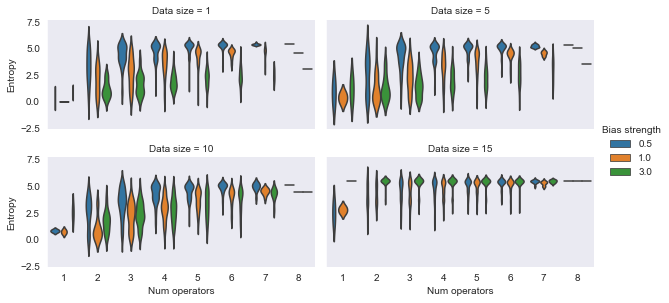

In [146]:
g = sns.catplot(
    x='Num operators', 
    y='Entropy',
    col='Data size',
    hue='Bias strength',
    col_wrap=2,
    data=subdf.rename(columns={
        'datasize': 'Data size',
        'surprisal': 'Entropy',
        'n_ops': 'Num operators',
        'temp': 'Bias strength'
    }),
    kind='violin',
    inner=None,
    height=figwidth,
    aspect=figwidth/(figwidth*0.5)
)

g.fig.savefig(
    './plots/entropy_by_datasize_with_250_participants.jpg', 
    dpi=300,
    bbox_inches="tight"
)

## Analyse by operators

In [23]:
dfs

,inferred_LoT,true_LoT,logp,p,n_ops,datasize,nparticipants,temp,surprisal,accepted
0,O_A_C_B_X_NA_NOR_NC,O_A_C_B_X_NA_NOR_NC,-5.962204,2.574233e-03,8,10,10,0.5,1.534810e-02,False
1,O_A_C_B_X_NA_NOR_NC,O_A_C_X_NA_NOR_NC,-5.545558,3.904764e-03,7,10,10,0.5,2.165410e-02,False
2,O_A_C_B_X_NA_NOR_NC,O_A_C_B_X_NOR_NC,-5.882607,2.787509e-03,7,10,10,0.5,1.639782e-02,False
3,O_A_C_B_X_NA_NOR_NC,O_A_C_X_NOR_NC,-5.849203,2.882196e-03,6,10,10,0.5,1.685855e-02,False
4,O_A_C_B_X_NA_NOR_NC,O_A_C_B_NA_NOR_NC,-5.746762,3.193104e-03,7,10,10,0.5,1.835001e-02,False
...,...,...,...,...,...,...,...,...,...,...
128159,NA,O_C_NA,-9.379233,8.445996e-05,3,5,60,3.0,7.921697e-04,False
128160,NA,C_NA,-208.478831,2.876033e-91,2,5,60,3.0,5.995921e-89,False
128161,NA,N_NA,-0.861212,4.226494e-01,2,5,60,3.0,3.639909e-01,False
128162,NA,O_NA,-21.661471,3.913294e-10,2,5,60,3.0,8.476772e-09,False


In [24]:
dfs['true_LoT'][6]

6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
           ...        
6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
6    O_A_B_X_NA_NOR_NC
Name: true_LoT, Length: 72, dtype: object

In [25]:
array_all_operators = (
    dfs['true_LoT']
    .str
    .split('_',expand=True)
)

In [27]:
array_all_operators

,0,1,2,3,4,5,6,7
0,O,A,C,B,X,NA,NOR,NC
1,O,A,C,X,NA,NOR,NC,None
2,O,A,C,B,X,NOR,NC,None
3,O,A,C,X,NOR,NC,None,None
4,O,A,C,B,NA,NOR,NC,None
...,...,...,...,...,...,...,...,...
128159,O,C,NA,None,None,None,None,None
128160,C,NA,None,None,None,None,None,None
128161,N,NA,None,None,None,None,None,None
128162,O,NA,None,None,None,None,None,None


In [26]:
for op in LoTs.columns:
    print(op)
    # get the mask of the languages with that operator
    mask_op = (array_all_operators==op).any(1)
    print(mask_op)

O
0          True
1          True
2          True
3          True
4          True
          ...  
128159     True
128160    False
128161    False
128162     True
128163    False
Length: 9227808, dtype: bool
A
0          True
1          True
2          True
3          True
4          True
          ...  
128159    False
128160    False
128161    False
128162    False
128163    False
Length: 9227808, dtype: bool
N
0         False
1         False
2         False
3         False
4         False
          ...  
128159    False
128160    False
128161     True
128162    False
128163    False
Length: 9227808, dtype: bool
C
0          True
1          True
2          True
3          True
4          True
          ...  
128159     True
128160     True
128161    False
128162    False
128163    False
Length: 9227808, dtype: bool
B
0          True
1         False
2          True
3         False
4          True
          ...  
128159    False
128160    False
128161    False
128162    False
128163    

# Plot serial and dynamic experiments

In [54]:
glob_path = "/mnt/c/Users/faust/Documents/LoT_recovery/serial_dynamic/*.npz"

In [57]:
learning_curves = dict()
for path in glob(glob_path):
    
    # print(path)
    with open(path, 'rb') as openf:
        npzfile = np.load(openf)
        
        LoTs = npzfile['LoTs']
        index = npzfile['index_true_LoT']
        LoT = LoTs[index]
        results = npzfile['results']
        histories = npzfile['histories']

    results = results.squeeze()
    
    # LoT = pd.Series(
    #     LoT,
    #     index=['O','A','N','C','B','X','NA','NOR','NC']
    # )
    
    # dimensions: (participant, LoT)
    histories = histories.squeeze()
    
    info = parse_path(path)
    try:
        learning_curves[(info['temp'], info['type'])].append(histories[:,index])
    except KeyError:
        learning_curves[(info['temp'], info['type'])] = [histories[:,index]]

In [93]:
[[y,len(x)] for y,x in learning_curves.items()]

[[(0.5, 'dynamic'), 145],
 [(0.5, 'serial'), 144],
 [(1.0, 'dynamic'), 162],
 [(1.0, 'serial'), 157],
 [(3.0, 'dynamic'), 358],
 [(3.0, 'serial'), 358],
 [(5.0, 'dynamic'), 358],
 [(5.0, 'serial'), 358]]

Since 5.0 serial has Nans, don't plot it

In [103]:
[
    np.any(list(map(lambda x: np.isnan(x).any(), x)))
    for x 
    in learning_curves.values()
]

[False, False, False, False, False, False, False, True]

In [84]:
def analyse_curves(curve):
    values, counts = np.unique(curve, return_counts=True)
    props = counts / counts.sum()
    return values, np.cumsum(props)

# dictionary containing for each parameter setting
# for each number of participants in which experiment were completed
# the proportion of experiments that were completed up to that number 
cumprops = {
    key: analyse_curves([len(y) for y in value])
    for (key,value) 
    in learning_curves.items()
}

In [91]:
learning_curves[(5.0,'serial')]

[array([-4.57479938, -4.57479938, -3.51988371, -3.26082234, -2.81290295,
        -2.40976516, -2.41699865, -2.36142055, -2.54506346, -2.19848303,
        -2.17794764, -1.98639124, -2.09935665,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,     

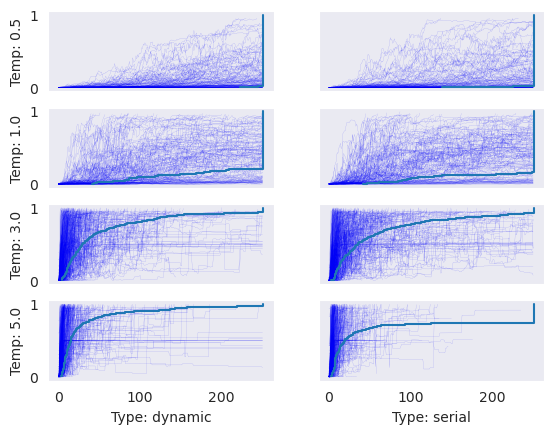

In [89]:
fig, axes = plt.subplots(4,2, sharex=True, sharey=True)
for i, ((temp,exp_type), lcs) in enumerate(learning_curves.items()):
    i_temp = i//2
    i_type = i%2
    ax = axes[i_temp, i_type]
    for lc in lcs:
        ax.plot(
            np.exp(lc),
            color='blue',
            lw=0.1,
            alpha=0.5
        )
    
    values, cprops = cumprops[(temp,exp_type)]
    ax.step(values, cprops, where='post')
    
    if i_type == 0:
        ax.set_ylabel(f'Temp: {temp}')
    if i_temp == 3:
        ax.set_xlabel(f'Type: {exp_type}')